In [28]:
import pandas as pd
import numpy as np

In [29]:
df1 = pd.read_excel("Block_Groups_Data_Census.xlsx")
df2 = pd.read_csv("ham_cbg_lodes_750.csv")
df3 = pd.read_csv("ham_cbg_lodes_5000.csv")

In [30]:
df1.columns

Index(['Unnamed: 0', 'Median age _Total', 'Male', 'Female', 'Total_Race',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Total_MEANS OF TRANSPORTATION TO WORK', 'Car, truck, or van:',
       'Drove alone', 'Carpooled:', 'In 2-person carpool',
       'In 3-person carpool', 'In 4-person carpool',
       'In 5- or 6-person carpool', 'In 7-or-more-person carpool',
       'Public transportation (excluding taxicab):', 'Bus',
       'Light rail, streetcar or trolley (carro público in Puerto Rico)',
       'Ferryboat', 'Taxicab', 'Motorcycle', 'Bicycle', 'Walked',
       'Other means', 'Worked from home',
       'Median household income in the past 12 months (in 2020 inflation-adjusted dollars)',
       'Occupied', 'Vacant', 'Median gross rent'],
      dtype='object')

In [31]:
df1 = df1.rename(columns= {'Unnamed: 0': 'name'})

In [32]:
df1= df1.replace('-', np.nan)
df1 = df1.dropna().reset_index(drop = True)
df1

,name,Median age _Total,Male,Female,Total_Race,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,Median household income in the past 12 months (in 2020 inflation-adjusted dollars),Occupied,Vacant,Median gross rent
0,"Block Group 1, Census Tract 4, Hamilton County...",38.1,35.5,38.4,"1,795",51,"1,744",0,0,0,...,0,0,0,61,0,0,"20,190",680,178,770
1,"Block Group 3, Census Tract 4, Hamilton County...",47.9,37.3,57.9,"1,607",243,"1,345",0,0,0,...,0,0,0,0,39,9,"32,070",819,88,757
2,"Block Group 1, Census Tract 6, Hamilton County...",34.0,36.8,32.7,970,812,101,7,37,0,...,0,0,9,19,0,61,"80,952",452,82,"1,164"
3,"Block Group 2, Census Tract 6, Hamilton County...",33.2,38.7,28.3,"1,464","1,310",58,0,49,0,...,0,0,17,18,44,68,"62,198",635,108,"1,309"
4,"Block Group 3, Census Tract 6, Hamilton County...",46.1,46.3,45.7,"1,192",851,0,0,328,0,...,0,0,0,9,0,64,"97,500",552,151,"1,508"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,"Block Group 3, Census Tract 123, Hamilton Coun...",44.4,48.4,42.1,"2,437","1,112","1,115",0,10,0,...,0,0,19,0,11,67,"34,307","1,153",181,638
194,"Block Group 1, Census Tract 124, Hamilton Coun...",19.8,20.0,19.8,"1,768","1,481",197,0,54,0,...,0,0,0,265,0,49,"51,944",166,47,987
195,"Block Group 2, Census Tract 124, Hamilton Coun...",27.4,31.0,25.8,"1,130","1,041",65,0,9,0,...,0,0,13,34,0,49,"100,320",502,62,"1,282"
196,"Block Group 3, Census Tract 124, Hamilton Coun...",28.9,26.4,33.3,948,637,236,0,5,0,...,0,0,10,34,0,64,"30,556",518,186,757


In [33]:
df2 = pd.DataFrame(df2[['name','transit_score']])
df3 = pd.DataFrame(df3[['name','transit_score']])

In [34]:
df2 = df2.rename(columns= {'transit_score': 'transit_score_job_750'})
df3 = df3.rename(columns= {'transit_score': 'transit_score_job_5000'})

In [35]:
final = pd.merge(pd.merge(df1, df2, on = 'name'), df3, on = 'name')
final.head()

,name,Median age _Total,Male,Female,Total_Race,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,Bicycle,Walked,Other means,Worked from home,Median household income in the past 12 months (in 2020 inflation-adjusted dollars),Occupied,Vacant,Median gross rent,transit_score_job_750,transit_score_job_5000
0,"Block Group 1, Census Tract 4, Hamilton County...",38.1,35.5,38.4,"1,795",51,"1,744",0,0,0,...,0,61,0,0,"20,190",680,178,770,0.392125,0.376727
1,"Block Group 1, Census Tract 6, Hamilton County...",34.0,36.8,32.7,970,812,101,7,37,0,...,9,19,0,61,"80,952",452,82,"1,164",0.342157,0.315649
2,"Block Group 2, Census Tract 6, Hamilton County...",33.2,38.7,28.3,"1,464","1,310",58,0,49,0,...,17,18,44,68,"62,198",635,108,"1,309",0.353747,0.385627
3,"Block Group 3, Census Tract 6, Hamilton County...",46.1,46.3,45.7,"1,192",851,0,0,328,0,...,0,9,0,64,"97,500",552,151,"1,508",0.371893,0.368921
4,"Block Group 1, Census Tract 7, Hamilton County...",43.4,47.5,37.7,994,940,0,0,33,0,...,7,0,0,23,"157,000",408,16,"1,750",0.405632,0.283762


In [36]:
df1 = pd.read_csv("ham_cbg_allmoves_750.csv")
df2 = pd.read_csv("ham_cbg_allmoves_5000.csv")

df2 = pd.DataFrame(df2[['name','transit_score']])
df1 = pd.DataFrame(df1[['name','transit_score']])

df1 = df1.rename(columns= {'transit_score': 'transit_score_all_750'})
df2 = df2.rename(columns= {'transit_score': 'transit_score_all_5000'})

In [37]:
final = pd.merge(pd.merge(final, df1, on = 'name'), df2, on = 'name')
final = final.drop(['name'], axis = 1)
final.head()

,Median age _Total,Male,Female,Total_Race,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Total_MEANS OF TRANSPORTATION TO WORK,...,Other means,Worked from home,Median household income in the past 12 months (in 2020 inflation-adjusted dollars),Occupied,Vacant,Median gross rent,transit_score_job_750,transit_score_job_5000,transit_score_all_750,transit_score_all_5000
0,38.1,35.5,38.4,"1,795",51,"1,744",0,0,0,475,...,0,0,"20,190",680,178,770,0.392125,0.376727,0.325078,0.352719
1,34.0,36.8,32.7,970,812,101,7,37,0,502,...,0,61,"80,952",452,82,"1,164",0.342157,0.315649,0.294380,0.352520
2,33.2,38.7,28.3,"1,464","1,310",58,0,49,0,830,...,44,68,"62,198",635,108,"1,309",0.353747,0.385627,0.385839,0.390958
3,46.1,46.3,45.7,"1,192",851,0,0,328,0,580,...,0,64,"97,500",552,151,"1,508",0.371893,0.368921,0.414286,0.400587
4,43.4,47.5,37.7,994,940,0,0,33,0,595,...,0,23,"157,000",408,16,"1,750",0.405632,0.283762,0.304626,0.409798


In [38]:
final = final.drop(['Native Hawaiian and Other Pacific Islander alone', 'Ferryboat'], axis = 1)

In [39]:
for i in list(final.columns):
    if(type(final[i][0]) == str):
        final[i]= final.apply(lambda x: float(x[i].replace(',','')), axis = 1)

In [40]:
final['Male'] = final['Male'].astype(float)

In [41]:
final.columns

Index(['Median age _Total', 'Male', 'Female', 'Total_Race', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Total_MEANS OF TRANSPORTATION TO WORK', 'Car, truck, or van:',
       'Drove alone', 'Carpooled:', 'In 2-person carpool',
       'In 3-person carpool', 'In 4-person carpool',
       'In 5- or 6-person carpool', 'In 7-or-more-person carpool',
       'Public transportation (excluding taxicab):', 'Bus',
       'Light rail, streetcar or trolley (carro público in Puerto Rico)',
       'Taxicab', 'Motorcycle', 'Bicycle', 'Walked', 'Other means',
       'Worked from home',
       'Median household income in the past 12 months (in 2020 inflation-adjusted dollars)',
       'Occupied', 'Vacant', 'Median gross rent', 'transit_score_job_750',
       'transit_score_job_5000', 'transit_score_all_750',
       'transit_score_all_5000'],
      dtype='object')

In [42]:
final = final.rename(columns= {'Median household income in the past 12 months (in 2020 inflation-adjusted dollars)': 'Median household income', 'Light rail, streetcar or trolley (carro público in Puerto Rico)': 'Light rail, streetcar or trolley',
    'American Indian and Alaska Native alone': 'American Indian and Alaska Native'})

In [43]:
final.corr()

,Median age _Total,Male,Female,Total_Race,White alone,Black or African American alone,American Indian and Alaska Native,Asian alone,Total_MEANS OF TRANSPORTATION TO WORK,"Car, truck, or van:",...,Other means,Worked from home,Median household income,Occupied,Vacant,Median gross rent,transit_score_job_750,transit_score_job_5000,transit_score_all_750,transit_score_all_5000
Median age _Total,1.000000,0.730164,0.751391,-0.213584,-0.204776,0.009175,0.048474,0.071908,-0.131961,-0.068824,...,0.068714,-0.096407,0.025490,0.053746,-0.100138,-0.107390,-0.180278,-0.290638,-0.291898,-0.118050
Male,0.730164,1.000000,0.274855,-0.049071,-0.063512,0.011091,0.036141,0.177541,0.040581,0.054590,...,0.384881,-0.056890,0.172971,0.109081,-0.032312,0.071153,-0.117526,-0.231967,-0.235062,-0.050572
Female,0.751391,0.274855,1.000000,-0.202246,-0.164420,0.021206,-0.005644,-0.061129,-0.128374,-0.126800,...,-0.082106,0.198455,-0.038726,0.027772,-0.057239,-0.192142,-0.090747,-0.209089,-0.209836,-0.034905
Total_Race,-0.213584,-0.049071,-0.202246,1.000000,0.530764,0.378676,-0.112839,0.189839,0.794632,0.705233,...,0.205430,0.287068,-0.009628,0.834838,0.383787,0.022004,-0.117509,0.045443,-0.032077,-0.060763
White alone,-0.204776,-0.063512,-0.164420,0.530764,1.000000,-0.558356,0.053994,0.181877,0.657210,0.662425,...,-0.122140,0.383492,0.458348,0.411011,-0.000696,0.449317,-0.038072,0.089374,0.207216,0.201160
Black or African American alone,0.009175,0.011091,0.021206,0.378676,-0.558356,1.000000,-0.154605,-0.130831,0.033321,-0.067588,...,0.372070,-0.154088,-0.479723,0.343266,0.361018,-0.441990,-0.013237,-0.017931,-0.215161,-0.215895
American Indian and Alaska Native,0.048474,0.036141,-0.005644,-0.112839,0.053994,-0.154605,1.000000,-0.031299,-0.065378,-0.034167,...,-0.059385,-0.028557,0.061420,-0.112813,-0.053659,0.018957,-0.193836,-0.231618,-0.233248,-0.212259
Asian alone,0.071908,0.177541,-0.061129,0.189839,0.181877,-0.130831,-0.031299,1.000000,0.209220,0.224494,...,-0.051091,0.168161,0.225834,0.127362,0.131923,0.292297,-0.008125,0.052826,0.075779,0.086614
Total_MEANS OF TRANSPORTATION TO WORK,-0.131961,0.040581,-0.128374,0.794632,0.657210,0.033321,-0.065378,0.209220,1.000000,0.947820,...,0.207303,0.471613,0.337519,0.794981,0.283771,0.266572,-0.024027,0.083611,0.106722,0.168219
"Car, truck, or van:",-0.068824,0.054590,-0.126800,0.705233,0.662425,-0.067588,-0.034167,0.224494,0.947820,1.000000,...,0.058947,0.326848,0.393642,0.776861,0.208031,0.291633,-0.116951,-0.001979,0.051817,0.111236


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

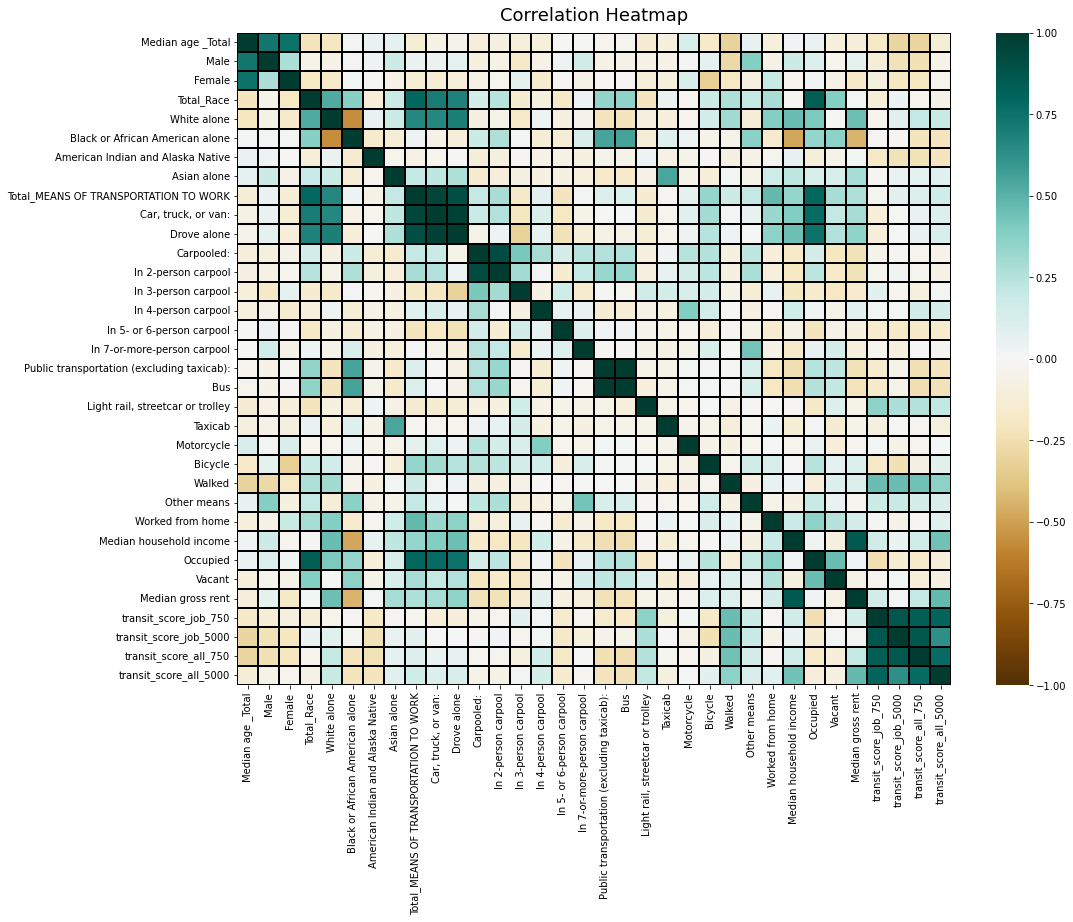

In [56]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(final.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG', linewidths = 2, linecolor = 'black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap3.png', dpi=300, bbox_inches='tight')

In [83]:
corrmatrix = final.corr()
corrmatrix.to_csv("correlation.csv")